In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Simple Linear Regression

In [3]:
df = pd.read_csv('weather.csv')

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
# X and Y need to be two-dimensional arrays of shape (n_samples, n_features) and (n_sample, n_targets) 

In [6]:
df['Humidity'].to_numpy()

array([0.89, 0.86, 0.89, ..., 0.56, 0.6 , 0.61])

In [7]:
humidity_X = df['Humidity'].to_numpy()
humidity_X.shape

(96453,)

In [8]:
humidity_X = humidity_X.reshape((-1, 1))
humidity_X.shape

(96453, 1)

In [9]:
humidity_X

array([[0.89],
       [0.86],
       [0.89],
       ...,
       [0.56],
       [0.6 ],
       [0.61]])

In [10]:
humidity_y = df["Apparent Temperature (C)"].to_numpy()
humidity_y.shape

(96453,)

In [11]:
humidity_y = humidity_y.reshape((-1,1))
humidity_y.shape

(96453, 1)

In [12]:
type(humidity_y), type(humidity_X)

(numpy.ndarray, numpy.ndarray)

In [13]:
# See slide on train/test dataset
#Train is generally 80 % of your dataset
#Test is generally 20 % of your dataset

In [14]:
# Split the data into training/testing sets
until = int(humidity_X.shape[0]*0.8)
humidity_X_train = humidity_X[:until]
humidity_X_test = humidity_X[until:]

In [15]:
# Split the targets into training/testing sets

humidity_y_train = humidity_y[:until]
humidity_y_test = humidity_y[until:]

In [16]:
humidity_X_train.shape, humidity_y_train.shape

((77162, 1), (77162, 1))

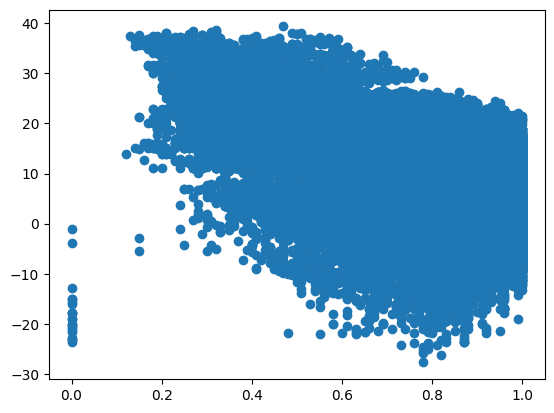

In [17]:
plt.scatter(humidity_X_train, humidity_y_train);

In [18]:
humidity_X_test.shape, humidity_X_train.shape

((19291, 1), (77162, 1))

In [19]:
# Create linear regression object

regr = linear_model.LinearRegression()

In [20]:
?regr.fit

In [21]:
# Train the model using the training sets

regr.fit(humidity_X_train, humidity_y_train)

LinearRegression()

In [22]:
# Next two cells visualize the model we just trained

In [23]:
humidity_y_pred = regr.predict(humidity_X_train)

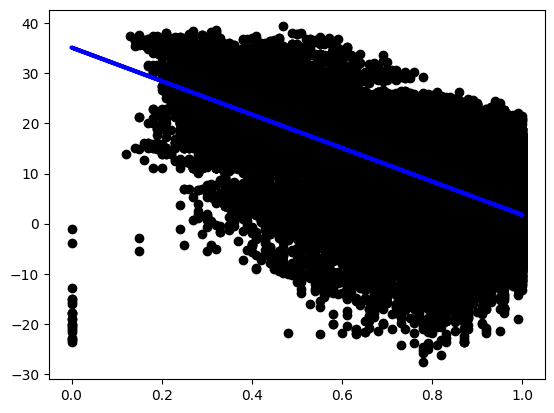

In [24]:
plt.scatter(humidity_X_train, humidity_y_train,  color='black')
plt.plot(humidity_X_train, humidity_y_pred, color='blue', linewidth=3)

plt.show()

In [25]:
# Make predictions using the testing set

humidity_y_pred = regr.predict(humidity_X_test)

In [26]:
# y = ax + b

In [27]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error

print('Mean squared error: ' + str(mean_squared_error(humidity_y_test, humidity_y_pred)))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: ' + str(r2_score(humidity_y_test, humidity_y_pred)))

Coefficients: 
 [[-33.40488498]]
Intercept: 
 [35.14448479]
Mean squared error: 66.80220072985146
Coefficient of determination: 0.34122410467847464


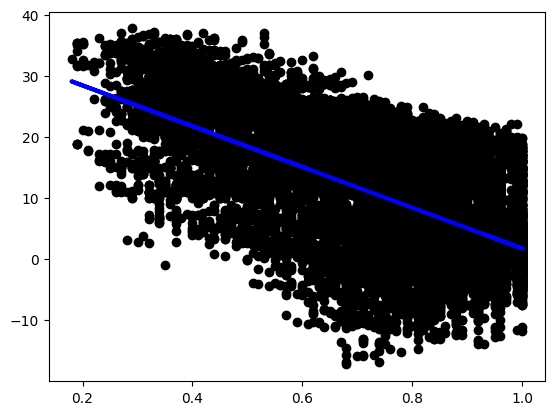

In [28]:
# Plot outputs

plt.scatter(humidity_X_test, humidity_y_test,  color='black')
plt.plot(humidity_X_test, humidity_y_pred, color='blue', linewidth=3)

plt.show()


## Polynomial Regression

In [29]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([15, 11, 2, 8, 25, 32])

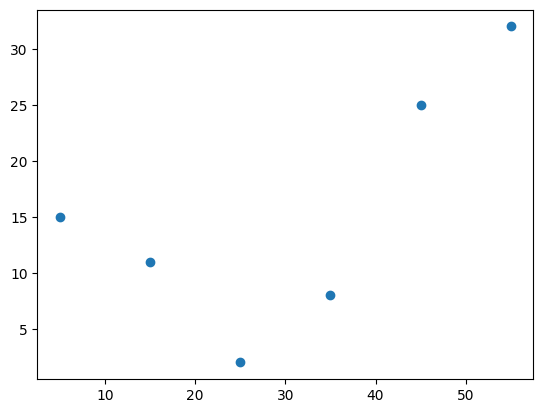

In [30]:
plt.scatter(x, y)
plt.show()

In [31]:
x.shape

(6, 1)

In [32]:
# degree can be greater than 2

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(x)
x_ = transformer.transform(x)

In [33]:
# Can replace the above three statements with
# x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [34]:
print(x_)

[[   5.   25.]
 [  15.  225.]
 [  25.  625.]
 [  35. 1225.]
 [  45. 2025.]
 [  55. 3025.]]


In [35]:
model = linear_model.LinearRegression()
model.fit(x_, y)

LinearRegression()

In [36]:
r_sq = model.score(x_, y)

print('coefficient of determination:', r_sq)

print('intercept:', model.intercept_)

print('coefficients:', model.coef_)

coefficient of determination: 0.8908516262498564
intercept: 21.37232142857144
coefficients: [-1.32357143  0.02839286]


In [37]:
# y = ax^2 + bx + c

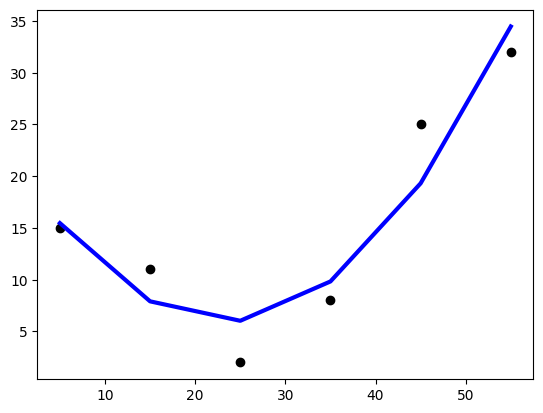

In [38]:
plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x_), color='blue', linewidth=3)

plt.show()